<h3>Exploratory Data Analysis of the simulation data</h3> 
The goal of this simulation was to answer the following questions:
<ul>
    <li>When is the deck able to pull off its primary game plan?</li>
    <li>What is the most consistent build?</li>
    <li>How much of a difference does going first and going second make?</li>
    <li>How many basic cards is the ideal number of basic cards?</li>
</ul>

In [39]:
import pandas as pd 

df = pd.read_csv(r'C:\Users\Jordan\project\card-game-simulation\data.csv')
display(df)

,heads/tails,basic_count,turn_PGP_reached
0,0,2,5
1,0,3,4
2,0,4,3
3,0,5,3
4,0,6,11
...,...,...,...
159995,1,5,2
159996,1,6,2
159997,1,7,3
159998,1,8,2


In [40]:
#Number of outliers - didn't successfully achieve primary game plan in 10 turns
print(len(df.loc[df['turn_PGP_reached'] == '10+']))

#Remove outliers
df = df.loc[df['turn_PGP_reached'] != '10+']
display(df)

0


,heads/tails,basic_count,turn_PGP_reached
0,0,2,5
1,0,3,4
2,0,4,3
3,0,5,3
4,0,6,11
...,...,...,...
159995,1,5,2
159996,1,6,2
159997,1,7,3
159998,1,8,2


In [41]:
import numpy as np

df_heads = df.loc[df['heads/tails'] == 0]
df_tails = df.loc[df['heads/tails'] == 1]

means, stds = [], []
for basic_count in range(2,10):
    means.append(df_heads.loc[df_heads['basic_count'] == basic_count]['turn_PGP_reached'].astype(float).mean())
    stds.append(df_heads.loc[df_heads['basic_count'] == basic_count]['turn_PGP_reached'].astype(float).std())

df_heads_results = pd.DataFrame(data={'basic_count':list(range(2,10)), 'average_turn_PGP_reached':means, 'standard_deviation_turn_PGP_reached':stds})
print('heads start')
display(df_heads_results)


means, stds = [], []
for basic_count in range(2,10):
    means.append(df_tails.loc[df_tails['basic_count'] == basic_count]['turn_PGP_reached'].astype(float).mean())
    stds.append(df_tails.loc[df_tails['basic_count'] == basic_count]['turn_PGP_reached'].astype(float).std())

df_tails_results = pd.DataFrame(data={'basic_count':list(range(2,10)), 'average_turn_PGP_reached':means, 'standard_deviation_turn_PGP_reached':stds})
print('tails start')
display(df_tails_results)

heads start


,basic_count,average_turn_PGP_reached,standard_deviation_turn_PGP_reached
0,2,4.0793,1.044376
1,3,3.8425,1.061323
2,4,3.7668,1.153495
3,5,3.7307,1.254566
4,6,3.7197,1.334582
5,7,3.7389,1.400758
6,8,3.7755,1.468644
7,9,3.7876,1.487383


tails start


,basic_count,average_turn_PGP_reached,standard_deviation_turn_PGP_reached
0,2,3.4323,1.229377
1,3,3.2403,1.295964
2,4,3.1314,1.413695
3,5,3.0991,1.536006
4,6,3.0668,1.611644
5,7,3.0624,1.701704
6,8,3.1050,1.800639
7,9,3.1353,1.815578


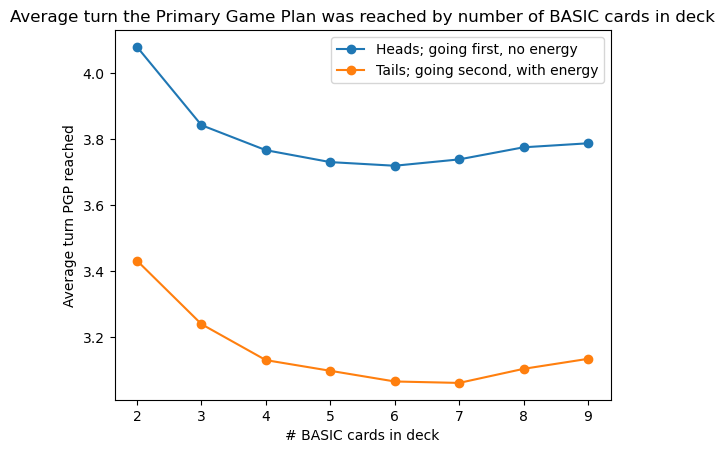

In [56]:
import matplotlib.pyplot as plt

y_heads = df_heads_results['average_turn_PGP_reached']
y_tails = df_tails_results['average_turn_PGP_reached']
plt.errorbar(range(2,10), y_heads, marker='o')
plt.errorbar(range(2,10), y_tails, marker='o')

plt.xlabel('# BASIC cards in deck')
plt.ylabel('Average turn PGP reached')
plt.title('Average turn the Primary Game Plan was reached by number of BASIC cards in deck')
plt.legend(['Heads; going first, no energy', 'Tails; going second, with energy'])
plt.show()

<h3>What do the results tell us?<h3>